In [10]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [11]:
# Loading data
train = pd.read_csv('../../data/train_1106_02.csv', index_col='id')
test = pd.read_csv('../../data/test_1106_02.csv', index_col='id')
X_train = train.drop(columns='playtime_forever')
y_train = train['playtime_forever']

In [4]:
# Hypermeter selecting
parameters = {
    'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 300, num = 10)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 5)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
rf = RandomForestRegressor()
rf_grid = GridSearchCV(estimator=rf, param_grid=parameters, cv=5, verbose=3, n_jobs=-1)

In [5]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   48.1s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:  4.4min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [10, 35, 60, 85, 110

In [6]:
rf_grid.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 133}

In [18]:
rf_grid.best_score_

0.3021805684608797

In [12]:
# Save the prediction
best_para = {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2,
             'min_samples_split': 2, 'n_estimators': 133}
rf = RandomForestRegressor(**best_para)
rf.fit(X_train, y_train)
playtime_forever = rf.predict(test)
submission = pd.DataFrame(data=playtime_forever, columns=['playtime_forever'])
submission.index.name = 'id'
submission.to_csv('../../submission/rf_1106_02.csv')

## See the features importance of random forest

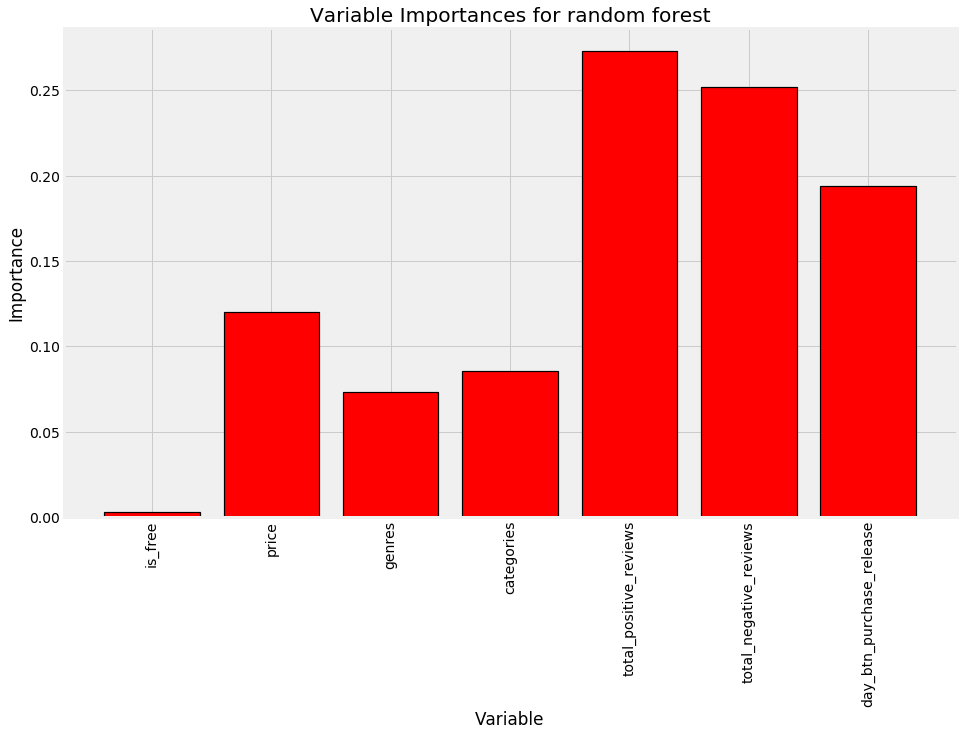

In [13]:
feature_list = list(X_train.columns)
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

plt.figure(figsize=(16,9))
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances for random forest');

In [15]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
-cv_results['test_score'].mean()

106.0910183414095